MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved to: C:\Users\zenox\AppData\Local\Temp\tmphm6w0vb2\metatron_cube_rotation.gif



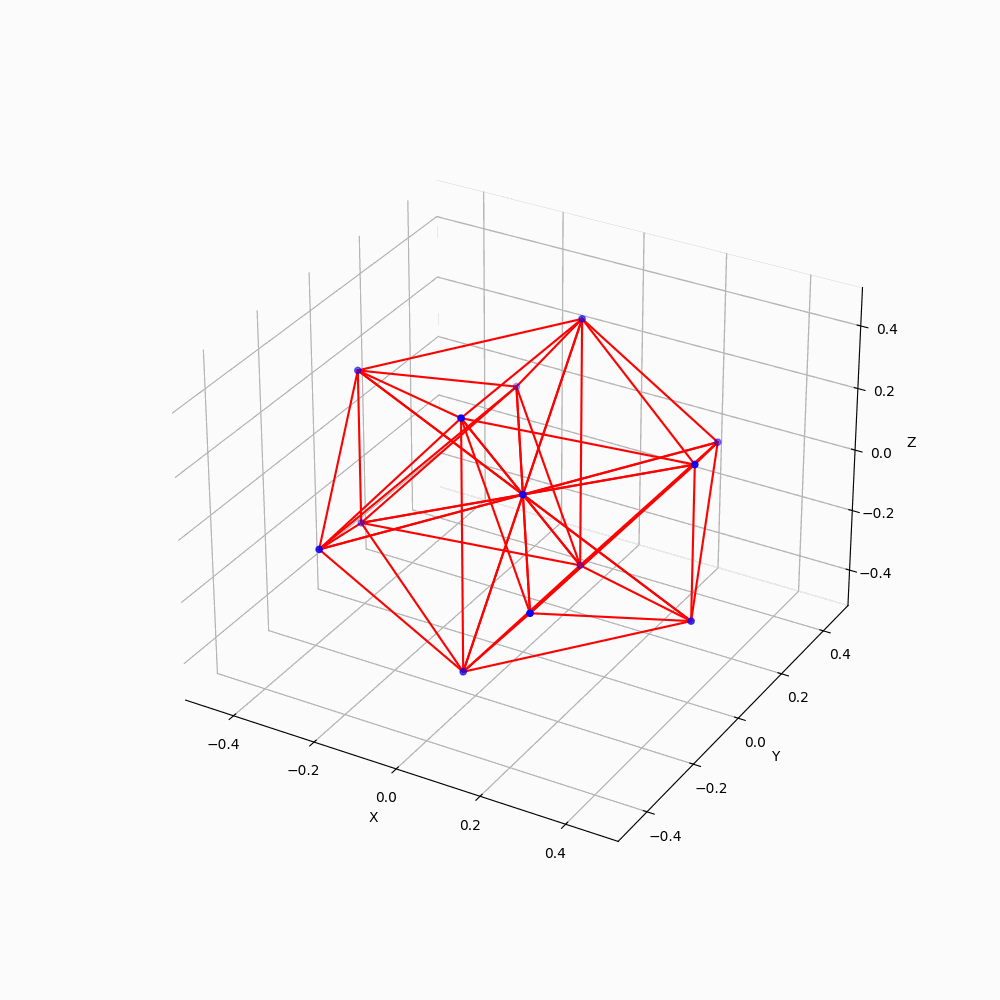

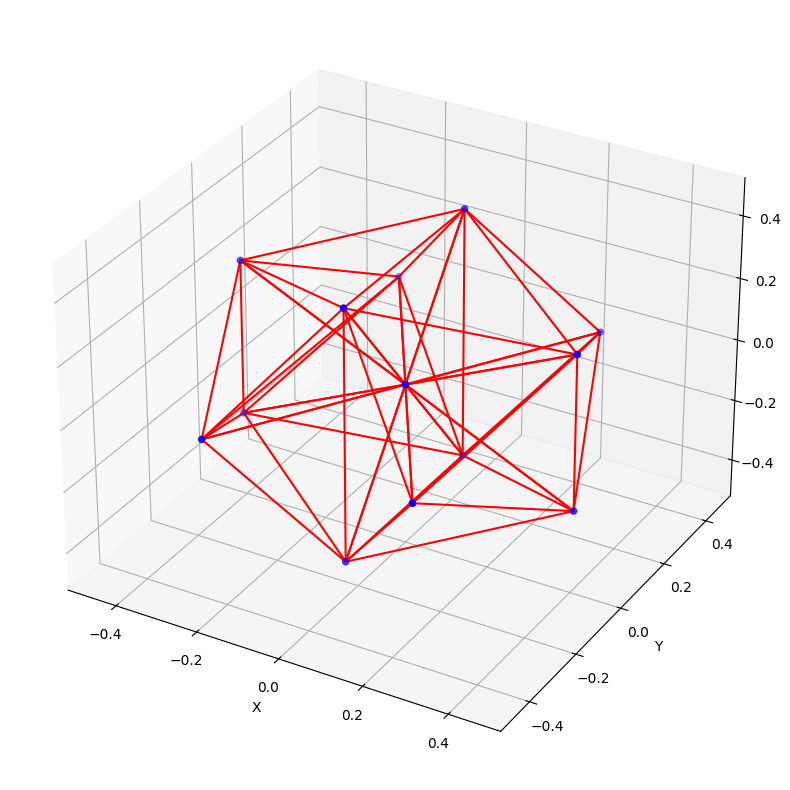

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import tempfile
import os
import base64

# Define the vertices and edges of the 4D Metatron's Cube
phi = (1 + np.sqrt(5)) / 2
vertices = np.array([
    [0, 1, phi, 0], [0, -1, phi, 0], [0, 1, -phi, 0], [0, -1, -phi, 0],
    [1, phi, 0, 0], [-1, phi, 0, 0], [1, -phi, 0, 0], [-1, -phi, 0, 0],
    [phi, 0, 1, 0], [-phi, 0, 1, 0], [phi, 0, -1, 0], [-phi, 0, -1, 0],
    [0, 0, 0, 1], [0, 0, 0, -1]
])

edges = [
    [0, 1], [0, 2], [0, 4], [0, 5], [0, 8], [0, 9],
    [1, 3], [1, 6], [1, 7], [1, 8], [1, 9],
    [2, 3], [2, 4], [2, 5], [2, 10], [2, 11],
    [3, 6], [3, 7], [3, 10], [3, 11],
    [4, 6], [4, 8], [4, 10],
    [5, 7], [5, 9], [5, 11],
    [6, 8], [6, 10],
    [7, 9], [7, 11],
    [8, 10], [9, 11],
    [12, 0], [12, 1], [12, 2], [12, 3], [12, 4], [12, 5], [12, 6], [12, 7], [12, 8], [12, 9], [12, 10], [12, 11],
    [13, 0], [13, 1], [13, 2], [13, 3], [13, 4], [13, 5], [13, 6], [13, 7], [13, 8], [13, 9], [13, 10], [13, 11]
]

# Function to project 4D points to 3D
def project_to_3d(point):
    w = 1 / (4 - point[3])
    x = point[0] * w
    y = point[1] * w
    z = point[2] * w
    return [x, y, z]

# Function to rotate a point in 4D space
def rotate_point(point, axis1, axis2, angle):
    rotated = point.copy()
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotated[axis1] = cos_angle * point[axis1] - sin_angle * point[axis2]
    rotated[axis2] = sin_angle * point[axis1] + cos_angle * point[axis2]
    return rotated

# Function to rotate the shape
def rotate_shape(vertices, angle_xw=0, angle_yw=0, angle_zw=0, angle_xy=0, angle_xz=0, angle_yz=0, angle_all=0):
    rotated_vertices = vertices.copy()
    for i in range(len(rotated_vertices)):
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 0, 3, angle_xw + angle_all)
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 1, 3, angle_yw + angle_all)
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 2, 3, angle_zw + angle_all)
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 0, 1, angle_xy + angle_all)
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 0, 2, angle_xz + angle_all)
        rotated_vertices[i] = rotate_point(rotated_vertices[i], 1, 2, angle_yz + angle_all)
    return rotated_vertices

# Initialize the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to update the plot
def animate(i):
    ax.clear()
    angle = i * 0.1
    rotated_vertices = rotate_shape(vertices, angle_xw=angle, angle_yw=angle, angle_zw=angle, angle_xy=angle, angle_xz=angle, angle_yz=angle)
    vertices_3d = np.array([project_to_3d(v) for v in rotated_vertices])
    
    # Plot edges
    for edge in edges:
        start, end = edge
        xs, ys, zs = zip(vertices_3d[start], vertices_3d[end])
        ax.plot(xs, ys, zs, color='r')
    
    # Plot vertices
    ax.scatter(vertices_3d[:, 0], vertices_3d[:, 1], vertices_3d[:, 2], color='b')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([-0.5, 0.5])

# Set up the animation
ani = animation.FuncAnimation(fig, animate, frames=100, blit=False)

# Increase the embed limit
plt.rcParams['animation.embed_limit'] = 50  # Increase the limit to 50 MB

# Create a temporary directory
with tempfile.TemporaryDirectory() as tempdir:
    gif_path = os.path.join(tempdir, 'metatron_cube_rotation.gif')
    
    # Save the animation as GIF
    ani.save(gif_path, writer='imagemagick', fps=10)  # Reduce fps to 10 to make the file smaller
    
    # Print the path to the GIF
    print(f"Animation saved to: {gif_path}")

    # Display the animation
    with open(gif_path, 'rb') as f:
        gif_data = f.read()
        b64_data = base64.b64encode(gif_data).decode('utf-8')
        display(HTML(f'<img src="data:image/gif;base64,{b64_data}" />'))
